**Training model using lightGBM on both raw and modified data**

Training set: 1688 samples
Testing set: 423 samples

Training LightGBM Classifier...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2102
[LightGBM] [Info] Number of data points in the train set: 1967, number of used features: 16
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

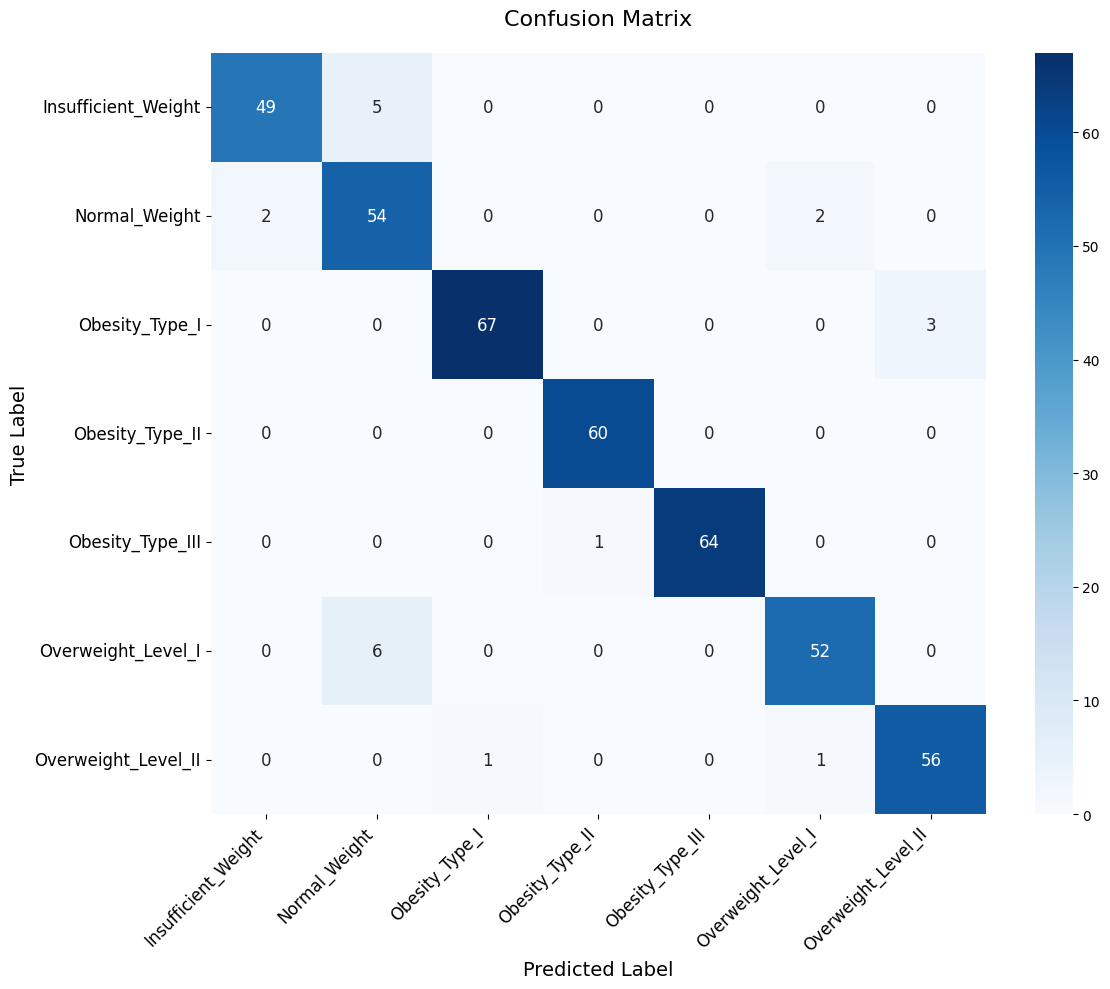

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
from lightgbm import callback

# Load dataset
df = pd.read_csv(r"C:\Users\maryam\Pictures\dhd_transformed_winsoring .csv")

# ------------------------
# 1. Data Preprocessing
# ------------------------
# Encode categorical features (excluding target)
for col in df.select_dtypes(include=['object']).drop(columns=["NObeyesdad"]).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["NObeyesdad"])

# Define y_classes
y_classes = np.unique(y)

# Separate features
X = df.drop(columns=["NObeyesdad"])

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# ------------------------
# 2. Feature Scaling
# ------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------
# 3. Handling Class Imbalance
# ------------------------
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# ------------------------
# 4. Model Training
# ------------------------
print("\nTraining LightGBM Classifier...")
lgb_train = lgb.Dataset(X_train_resampled, y_train_resampled)
lgb_test = lgb.Dataset(X_test_scaled, y_test, reference=lgb_train)

params = {
    'objective': 'multiclass',
    'num_class': len(y_classes),
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'random_state': 42
}

# Train the model with early stopping
model = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_test],
    callbacks=[callback.early_stopping(stopping_rounds=10)],

)

# ------------------------
# 5. Model Evaluation
# ------------------------
# Predictions
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
y_pred_proba = model.predict(X_test_scaled)  # Predicted probabilities

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"ROC-AUC Score (One-vs-Rest): {roc_auc:.4f}")

# Confusion Matrix
plt.figure(figsize=(12, 10))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
    annot_kws={"size": 12}
)

# Customize the plot
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels and adjust alignment
plt.yticks(fontsize=12)  # Adjust y-axis font size
plt.xlabel('Predicted Label', fontsize=14)  # Add x-axis label
plt.ylabel('True Label', fontsize=14)  # Add y-axis label
plt.title("Confusion Matrix", fontsize=16, pad=20)  # Add title and adjust padding

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Training set: 991 samples
Testing set: 248 samples

Training LightGBM Classifier...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2095
[LightGBM] [Info] Number of data points in the train set: 1498, number of used features: 15
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

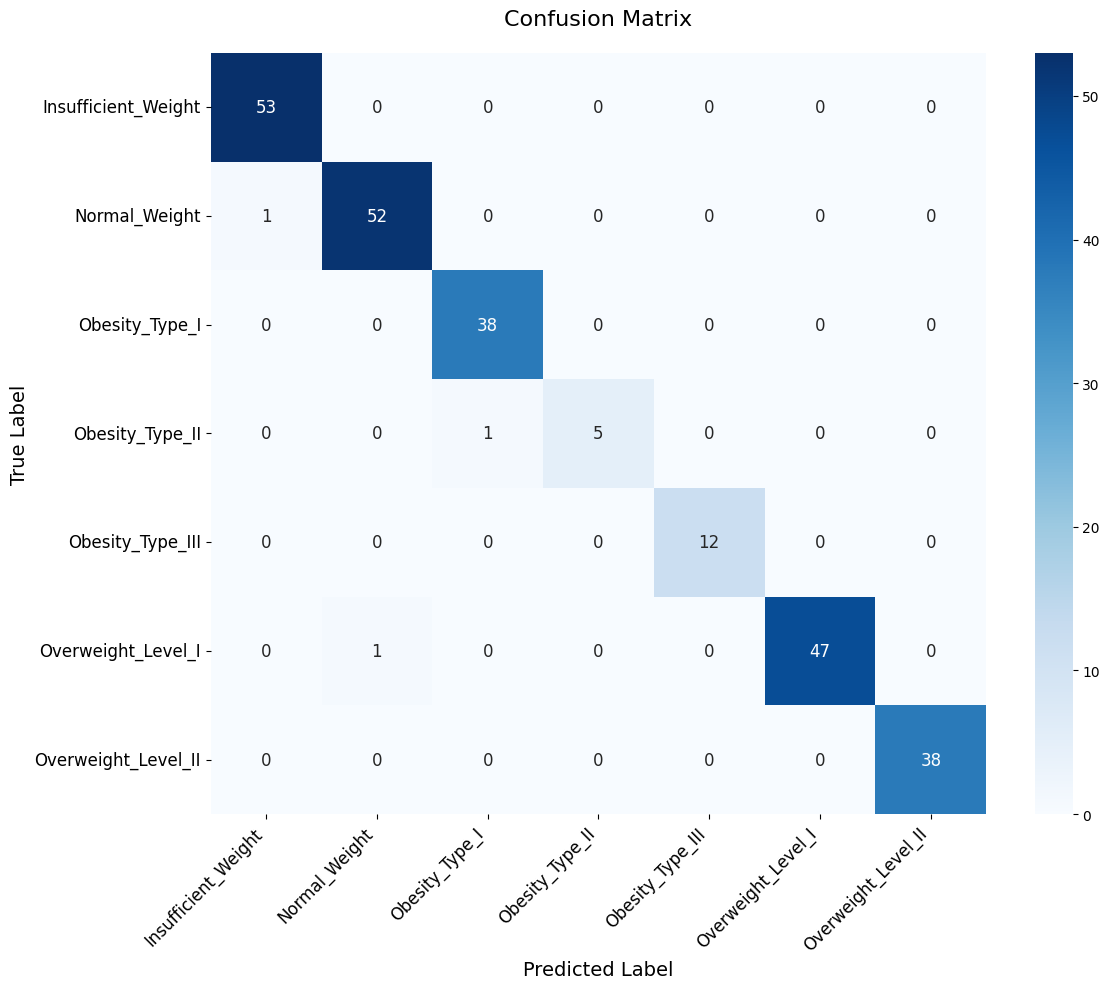

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
from lightgbm import callback

# Load dataset
df = pd.read_csv(r"C:\Users\maryam\Pictures\age+weight_done.csv")

# ------------------------
# 1. Data Preprocessing
# ------------------------
# Encode categorical features (excluding target)
for col in df.select_dtypes(include=['object']).drop(columns=["NObeyesdad"]).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["NObeyesdad"])

# Define y_classes
y_classes = np.unique(y)

# Separate features
X = df.drop(columns=["NObeyesdad"])

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# ------------------------
# 2. Feature Scaling
# ------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------
# 3. Handling Class Imbalance
# ------------------------
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# ------------------------
# 4. Model Training
# ------------------------
print("\nTraining LightGBM Classifier...")
lgb_train = lgb.Dataset(X_train_resampled, y_train_resampled)
lgb_test = lgb.Dataset(X_test_scaled, y_test, reference=lgb_train)

params = {
    'objective': 'multiclass',
    'num_class': len(y_classes),
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'random_state': 42
}

# Train the model with early stopping
model = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_test],
    callbacks=[callback.early_stopping(stopping_rounds=10)],

)

# ------------------------
# 5. Model Evaluation
# ------------------------
# Predictions
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
y_pred_proba = model.predict(X_test_scaled)  # Predicted probabilities

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"ROC-AUC Score (One-vs-Rest): {roc_auc:.4f}")

# Confusion Matrix
plt.figure(figsize=(12, 10))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
    annot_kws={"size": 12}
)

# Customize the plot
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels and adjust alignment
plt.yticks(fontsize=12)  # Adjust y-axis font size
plt.xlabel('Predicted Label', fontsize=14)  # Add x-axis label
plt.ylabel('True Label', fontsize=14)  # Add y-axis label
plt.title("Confusion Matrix", fontsize=16, pad=20)  # Add title and adjust padding

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Comparing different ways to balance the imbalanced data**

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import lightgbm as lgb
from lightgbm import callback
from sklearn.utils.class_weight import compute_class_weight

# Function to load and preprocess dataset
def load_and_preprocess(file_path):
    df = pd.read_csv(file_path)
    # Encode categorical features (excluding target)
    for col in df.select_dtypes(include=['object']).drop(columns=["NObeyesdad"]).columns:
        df[col] = LabelEncoder().fit_transform(df[col])
    # Encode target variable
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df["NObeyesdad"])
    X = df.drop(columns=["NObeyesdad"])
    return X, y, label_encoder

# Function to train and evaluate LightGBM model
def train_and_evaluate(X_train, y_train, X_test, y_test, method_name):
    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train LightGBM model
    lgb_train = lgb.Dataset(X_train_scaled, y_train)
    lgb_test = lgb.Dataset(X_test_scaled, y_test, reference=lgb_train)

    params = {
        'objective': 'multiclass',
        'num_class': len(np.unique(y_train)),
        'metric': 'multi_logloss',
        'boosting_type': 'gbdt',
        'learning_rate': 0.1,
        'num_leaves': 31,
        'random_state': 42
    }

    model = lgb.train(
        params,
        lgb_train,
        num_boost_round=100,
        valid_sets=[lgb_test],
        callbacks=[callback.early_stopping(stopping_rounds=10)],

    )

    # Evaluate model
    y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
    y_pred_proba = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    return accuracy, roc_auc

# Load datasets
dataset1 = 'C:\\Users\\maryam\\Pictures\\age+weight_done.csv'
dataset2 = 'C:\\Users\\maryam\\Pictures\\dhd_transformed_winsoring .csv'

X1, y1, _ = load_and_preprocess(dataset1)
X2, y2, _ = load_and_preprocess(dataset2)

# Split data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, stratify=y2, random_state=42)

# Initialize results table
results = []

# Undersampling
undersampler = RandomUnderSampler(random_state=42)
X1_train_under, y1_train_under = undersampler.fit_resample(X1_train, y1_train)
X2_train_under, y2_train_under = undersampler.fit_resample(X2_train, y2_train)

acc1, roc1 = train_and_evaluate(X1_train_under, y1_train_under, X1_test, y1_test, "Undersampling")
acc2, roc2 = train_and_evaluate(X2_train_under, y2_train_under, X2_test, y2_test, "Undersampling")
results.append(["Undersampling", dataset1, acc1, roc1])
results.append(["Undersampling", dataset2, acc2, roc2])

# Oversampling (SMOTE)
smote = SMOTE(random_state=42)
X1_train_over, y1_train_over = smote.fit_resample(X1_train, y1_train)
X2_train_over, y2_train_over = smote.fit_resample(X2_train, y2_train)

acc1, roc1 = train_and_evaluate(X1_train_over, y1_train_over, X1_test, y1_test, "Oversampling (SMOTE)")
acc2, roc2 = train_and_evaluate(X2_train_over, y2_train_over, X2_test, y2_test, "Oversampling (SMOTE)")
results.append(["Oversampling (SMOTE)", dataset1, acc1, roc1])
results.append(["Oversampling (SMOTE)", dataset2, acc2, roc2])

# Class Weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y1_train), y=y1_train)
class_weight_dict = dict(zip(np.unique(y1_train), class_weights))

acc1, roc1 = train_and_evaluate(X1_train, y1_train, X1_test, y1_test, "Class Weights")
acc2, roc2 = train_and_evaluate(X2_train, y2_train, X2_test, y2_test, "Class Weights")
results.append(["Class Weights", dataset1, acc1, roc1])
results.append(["Class Weights", dataset2, acc2, roc2])

# Create comparison table
comparison_table = pd.DataFrame(results, columns=["Method", "Dataset", "Accuracy", "ROC-AUC Score"])
print(comparison_table)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 362
[LightGBM] [Info] Number of data points in the train set: 189, number of used features: 13
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

**Working with the best option offering best accurracy (the modified data + OVERSAMPLING)**

C:\Users\maryam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Applying SMOTE for oversampling...

Training LightGBM Classifier...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2095
[LightGBM] [Info] Number of data points in the train set: 1498, number of used features: 15
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

<Figure size 1000x800 with 0 Axes>

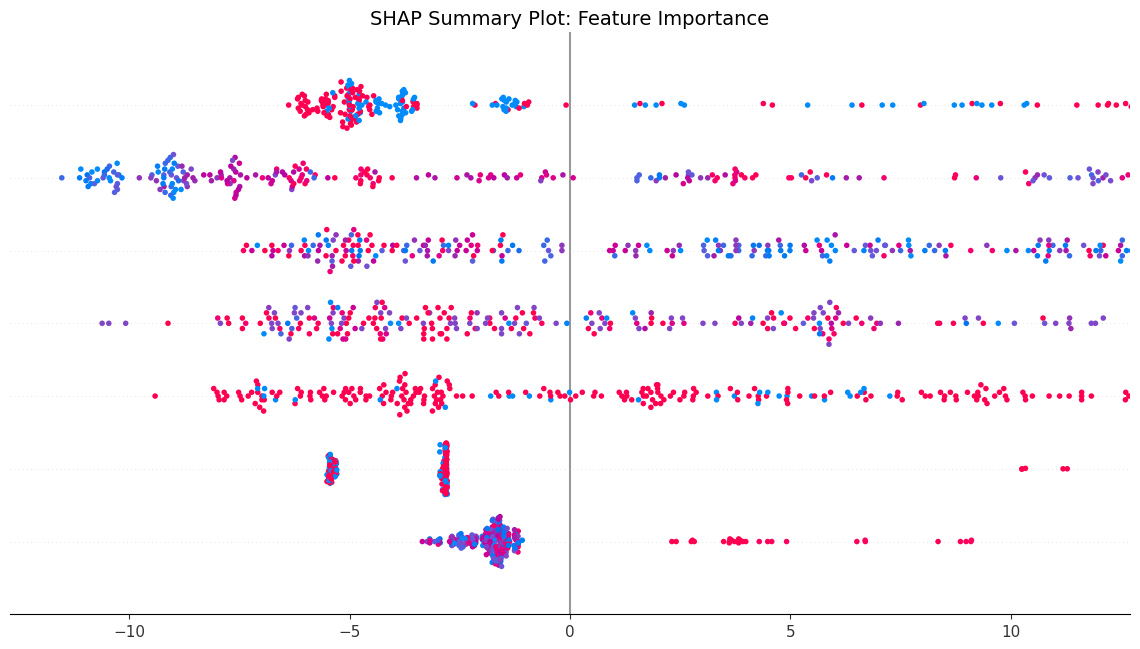

In [5]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
from lightgbm import callback

# Load your dataset
df = pd.read_csv('C:\\Users\\maryam\\Pictures\\age+weight_done.csv')


# ------------------------
# 1. Data Preprocessing
# ------------------------
# Encode categorical features (excluding target)
for col in df.select_dtypes(include=['object']).drop(columns=["NObeyesdad"]).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["NObeyesdad"])

# Separate features
X = df.drop(columns=["NObeyesdad"])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ------------------------
# 2. Feature Scaling
# ------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------
# 3. Oversampling with SMOTE
# ------------------------
print("\nApplying SMOTE for oversampling...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# ------------------------
# 4. Train LightGBM Model
# ------------------------
print("\nTraining LightGBM Classifier...")
lgb_train = lgb.Dataset(X_train_resampled, y_train_resampled)
lgb_test = lgb.Dataset(X_test_scaled, y_test, reference=lgb_train)

# Define LightGBM parameters
params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train_resampled)),
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'random_state': 42
}

# Train the model
model = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_test],
    callbacks=[callback.early_stopping(stopping_rounds=10)],

)

# ------------------------
# 5. SHAP Summary Plot
# ------------------------
# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)

# Create SHAP summary plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns, class_names=label_encoder.classes_, show=False)
plt.title("SHAP Summary Plot: Feature Importance", fontsize=14)
plt.tight_layout()
plt.show()
